In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d ialabISEP/footballsoccer-statistics

Dataset URL: https://www.kaggle.com/datasets/ialabISEP/footballsoccer-statistics
License(s): unknown
  0% 0.00/2.49M [00:00<?, ?B/s]
100% 2.49M/2.49M [00:00<00:00, 149MB/s]


In [ ]:
!unzip footballsoccer-statistics.zip

Archive:  footballsoccer-statistics.zip
  inflating: africa.csv              
  inflating: america.csv             
  inflating: asie.csv                
  inflating: dataset_football_cleaned.csv  
  inflating: europe.csv              


In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
df1=pd.read_csv('/content/dataset_football_cleaned.csv', encoding='latin')
print('Shape before deleting duplicate values:', df1.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
df1.head(10)

Shape before deleting duplicate values: (12711, 44)


,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,4000000.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0
1,LÃ©oNatel,NaN,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,800000.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Vidigal,AndrÃ©,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,650000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Antoniou,BaiAndrew,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Tribeau,Yoann,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,200000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,MarlonSilva,NaN,28,Brazil,FirstDivision,AlkiOroklini,0,0,Forward,150000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,Konstantinou,Stavrinos,21,Cyprus,FirstDivision,AlkiOroklini,0,7,Forward,100000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
7,Belameiri,ElHadi,27,Algeria,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,400000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8,Acosta,Rafael,29,Venezuela,FirstDivision,AlkiOroklini,0,12,CentralMidfield,200000.0,...,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0,0
9,Spoljaric,Matija,21,Cyprus,FirstDivision,AlkiOroklini,0,7,CentralMidfield,500000.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0


# Problem Statement Definition
Creating a prediction model to predict the price(price) of players

<Axes: >

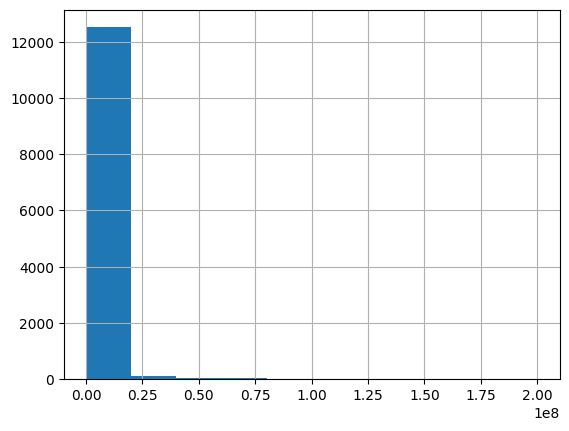

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the price values
df1['price'].hist()

In [ ]:
df1.head()

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
0,Etheridge,Neil,28,Philippines,PremierLeague,Cardiff,0,60,Goalkeeper,4000000.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,0
1,LÃ©oNatel,NaN,21,Brazil,FirstDivision,APOELNicosia,0,0,RightWinger,800000.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Vidigal,AndrÃ©,20,Portugal,FirstDivision,APOELNicosia,0,1,RightWinger,650000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Antoniou,BaiAndrew,21,Australia,FirstDivision,AlkiOroklini,0,0,SecondStriker,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,Tribeau,Yoann,30,France,FirstDivision,AlkiOroklini,0,0,AttackingMidfield,200000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
df1.tail()

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
12706,Neto,Eduardo,30,Brazil,J1League,NagoyaGrampus,0,0,DefensiveMidfield,1350000.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0
12707,Soma,Yuki,21,Japan,J1League,NagoyaGrampus,0,0,Midfielder,75000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12708,Fujii,Haruya,18,Japan,J1League,NagoyaGrampus,0,0,Defender,50000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12709,Takeda,Yohei,31,Japan,J1League,NagoyaGrampus,0,0,Goalkeeper,125000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12710,Shibuya,Tsubasa,24,Japan,J1League,NagoyaGrampus,0,0,Goalkeeper,100000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12711 entries, 0 to 12710
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          12711 non-null  object 
 1   first_name                    11652 non-null  object 
 2   age                           12711 non-null  int64  
 3   nation                        12711 non-null  object 
 4   league                        12711 non-null  object 
 5   team                          12711 non-null  object 
 6   goals_selection               12711 non-null  int64  
 7   selections_nation             12711 non-null  int64  
 8   position                      12711 non-null  object 
 9   price                         12711 non-null  float64
 10  end_contract                  8434 non-null   float64
 11  goal_champ                    12711 non-null  float64
 12  assist_champ                  12711 non-null  float64
 13  o

In [ ]:
df1.describe(include='all')

,name,first_name,age,nation,league,team,goals_selection,selections_nation,position,price,...,assist_continent,own_goal_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent,penalty_goal_continent,conceded_goal_continent,clean_sheet_continent
count,12711,11652,12711.000000,12711,12711,12711,12711.000000,12711.000000,12711,1.271100e+04,...,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.000000,12711.0,12711.0
unique,9202,4610,NaN,167,74,1057,NaN,NaN,12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,RodrÃ­guez,Mohamed,NaN,Brazil,PremierLeague,TokushimaVort.,NaN,NaN,Goalkeeper,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,47,85,NaN,860,781,37,NaN,NaN,2450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,26.072378,NaN,NaN,NaN,0.604909,5.788215,NaN,1.774767e+06,...,0.483046,0.008733,1.085123,1.194949,0.621745,0.943277,0.239556,0.038392,0.0,0.0
std,NaN,NaN,4.564766,NaN,NaN,NaN,2.632483,14.979703,NaN,7.240789e+06,...,1.925155,0.100365,2.787263,3.484809,1.986923,6.129151,1.803737,0.336510,0.0,0.0
min,NaN,NaN,16.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,2.000000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,NaN,NaN,23.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,1.000000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,NaN,NaN,26.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,3.000000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,NaN,NaN,29.000000,NaN,NaN,NaN,0.000000,4.000000,NaN,8.000000e+05,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
df1.nunique()

,0
name,9202
first_name,4610
age,29
nation,167
league,74
team,1057
goals_selection,41
selections_nation,135
position,12
price,132


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'goals_selection'}>,
        <Axes: title={'center': 'selections_nation'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'end_contract'}>,
        <Axes: title={'center': 'goal_champ'}>],
       [<Axes: title={'center': 'assist_champ'}>,
        <Axes: title={'center': 'own_goal_champ'}>,
        <Axes: title={'center': 'sub_on_champ'}>,
        <Axes: title={'center': 'sub_out_champ'}>,
        <Axes: title={'center': 'yellow_card_champ'}>,
        <Axes: title={'center': 'second_yellow_card_champ'}>],
       [<Axes: title={'center': 'red_card_champ'}>,
        <Axes: title={'center': 'penalty_goal_champ'}>,
        <Axes: title={'center': 'conceded_goal_champ'}>,
        <Axes: title={'center': 'clean_sheet_champ'}>,
        <Axes: title={'center': 'goal_cup'}>,
        <Axes: title={'center': 'assist_cup'}>],
       [<Axes: title={'center': 'own_goal_cup'}>,
        <Axes: title={'

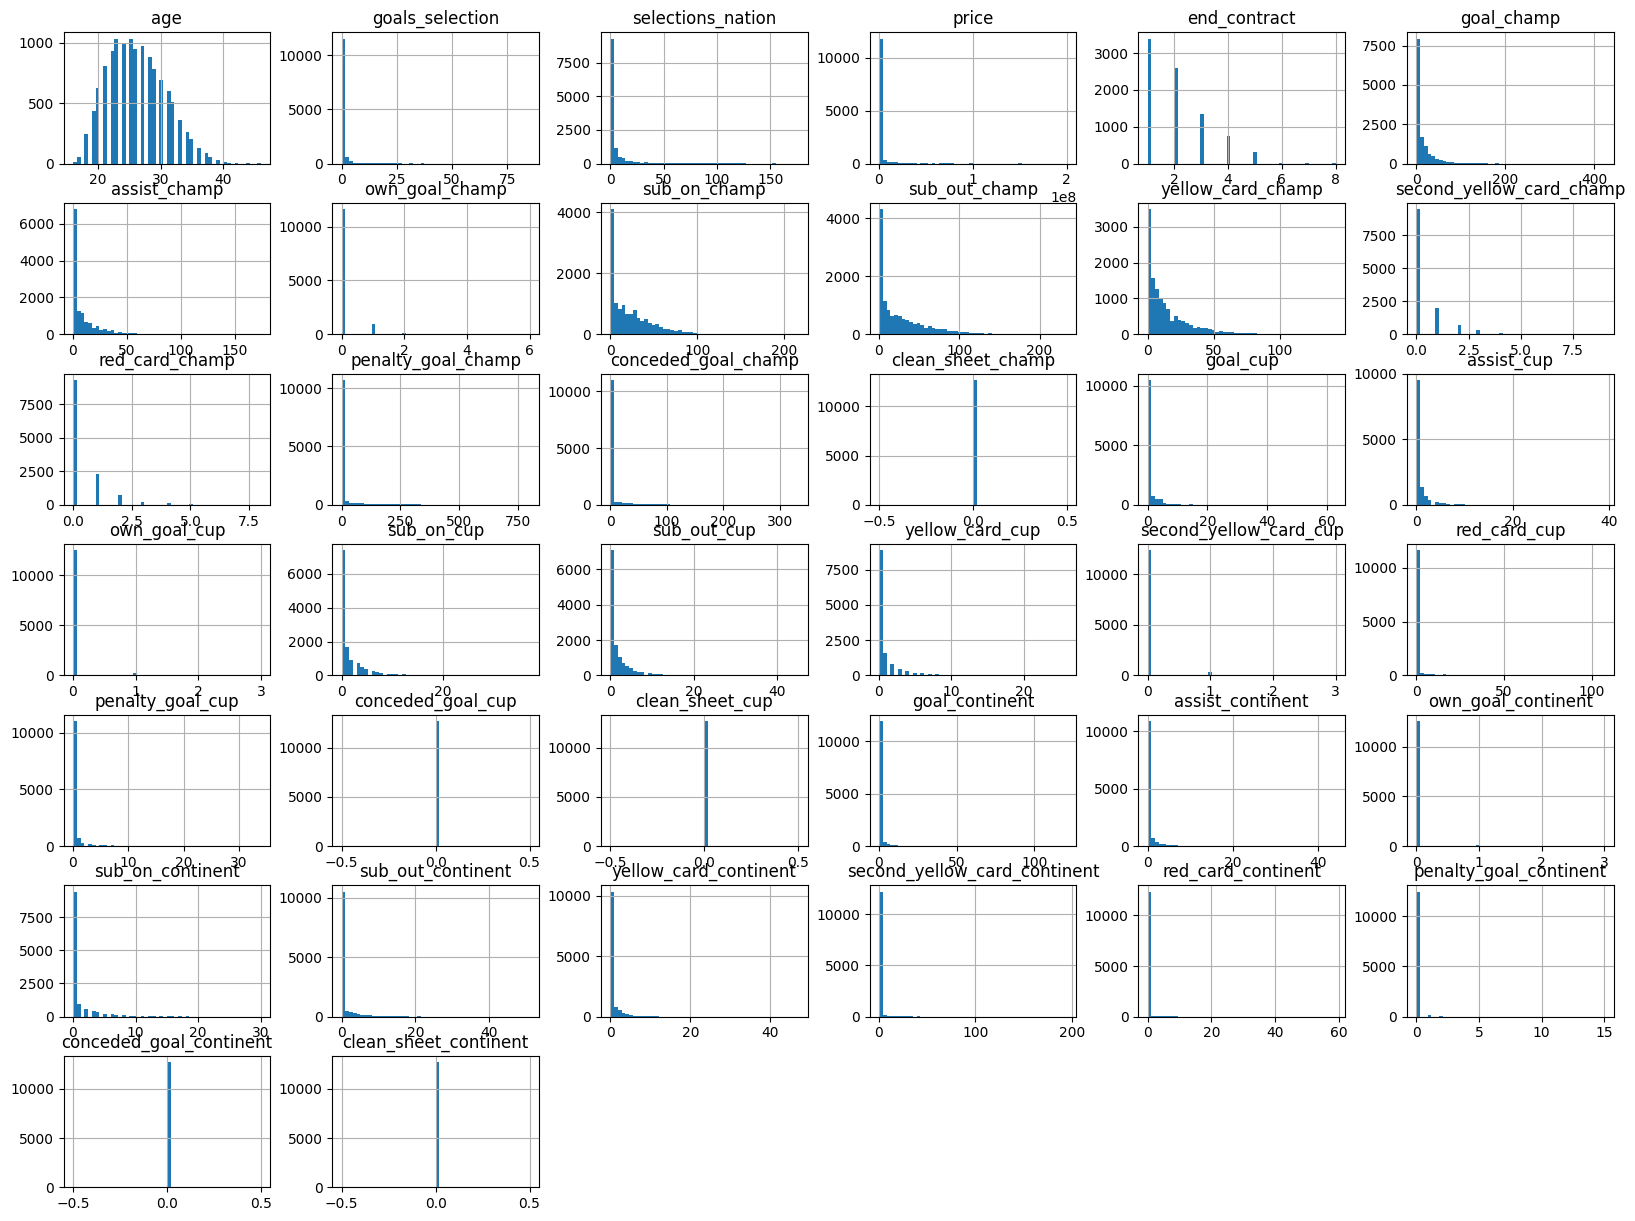

In [ ]:
df1.hist(bins=50, figsize=(20,15))

In [ ]:
df1.columns

Index(['name', 'first_name', 'age', 'nation', 'league', 'team',
       'goals_selection', 'selections_nation', 'position', 'price',
       'end_contract', 'goal_champ', 'assist_champ', 'own_goal_champ',
       'sub_on_champ', 'sub_out_champ', 'yellow_card_champ',
       'second_yellow_card_champ', 'red_card_champ', 'penalty_goal_champ',
       'conceded_goal_champ', 'clean_sheet_champ', 'goal_cup', 'assist_cup',
       'own_goal_cup', 'sub_on_cup', 'sub_out_cup', 'yellow_card_cup',
       'second_yellow_card_cup', 'red_card_cup', 'penalty_goal_cup',
       'conceded_goal_cup', 'clean_sheet_cup', 'goal_continent',
       'assist_continent', 'own_goal_continent', 'sub_on_continent',
       'sub_out_continent', 'yellow_card_continent',
       'second_yellow_card_continent', 'red_card_continent',
       'penalty_goal_continent', 'conceded_goal_continent',
       'clean_sheet_continent'],
      dtype='object')

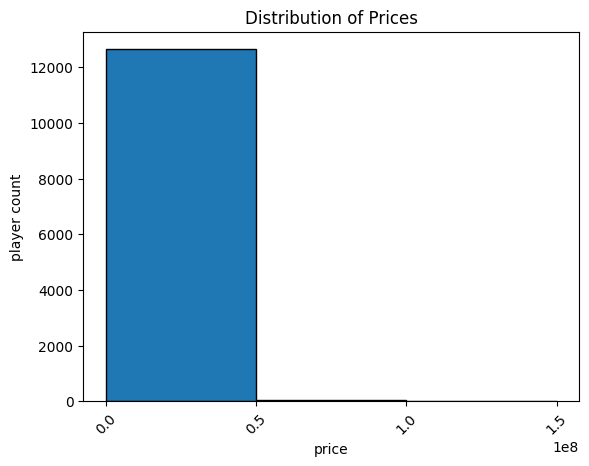

In [ ]:
import matplotlib.pyplot as plt

#Assuming df1 is your DataFrame and 'price' column is already numeric
bins = range(0, 200000000, 50000000)  # Creating bins from 0 to 150k with 5k intervals

plt.hist(df1['price'], bins=bins, edgecolor='black')
plt.xlabel('price')
plt.ylabel('player count')
plt.title('Distribution of Prices')
plt.xticks(bins, rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
df1['price'].max()

200000000.0

<Axes: >

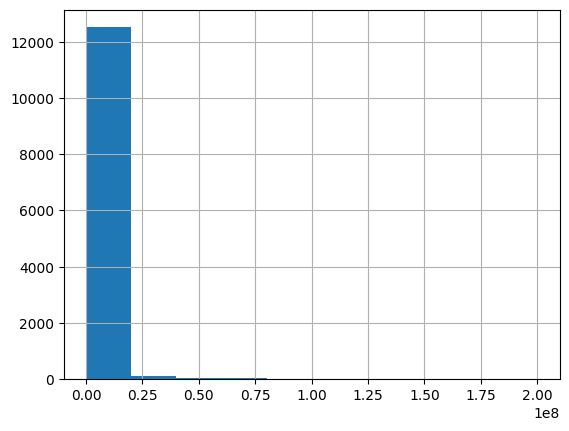

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the price values
df1['price'].hist()

In [ ]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

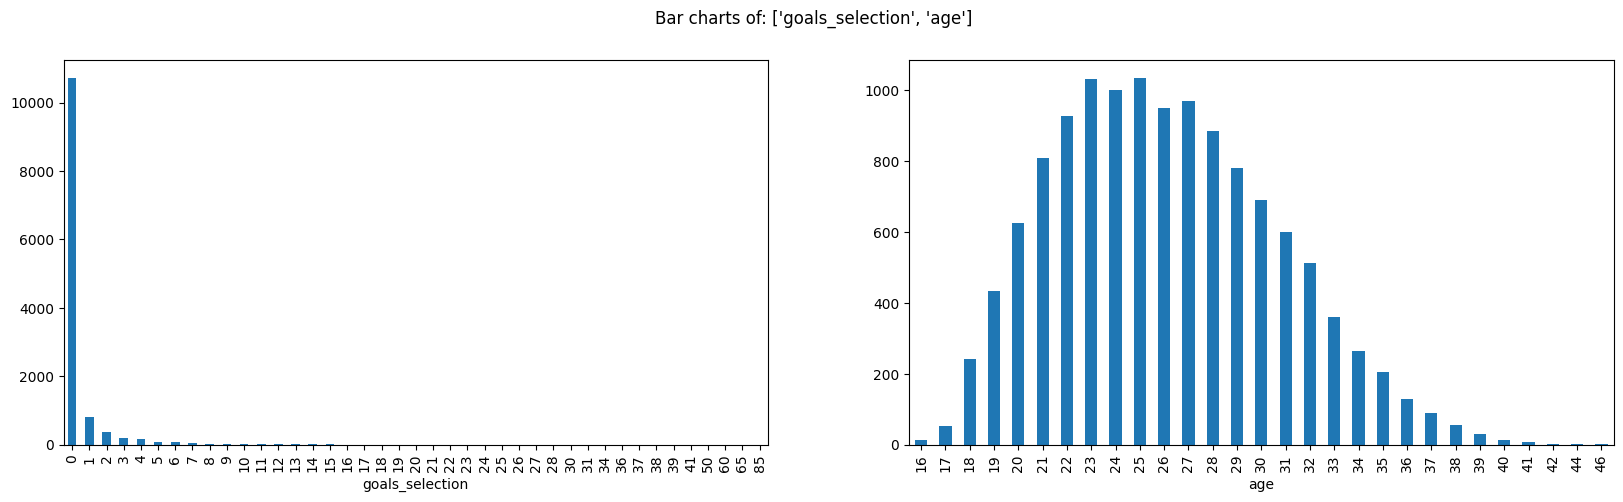

In [ ]:
PlotBarCharts(inpData=df1, colsToPlot=['goals_selection','age'])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'goals_selection'}>,
        <Axes: title={'center': 'selections_nation'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'end_contract'}>,
        <Axes: title={'center': 'goal_champ'}>],
       [<Axes: title={'center': 'assist_champ'}>,
        <Axes: title={'center': 'own_goal_champ'}>,
        <Axes: title={'center': 'sub_on_champ'}>,
        <Axes: title={'center': 'sub_out_champ'}>,
        <Axes: title={'center': 'yellow_card_champ'}>,
        <Axes: title={'center': 'second_yellow_card_champ'}>],
       [<Axes: title={'center': 'red_card_champ'}>,
        <Axes: title={'center': 'penalty_goal_champ'}>,
        <Axes: title={'center': 'conceded_goal_champ'}>,
        <Axes: title={'center': 'clean_sheet_champ'}>,
        <Axes: title={'center': 'goal_cup'}>,
        <Axes: title={'center': 'assist_cup'}>],
       [<Axes: title={'center': 'own_goal_cup'}>,
        <Axes: title={'

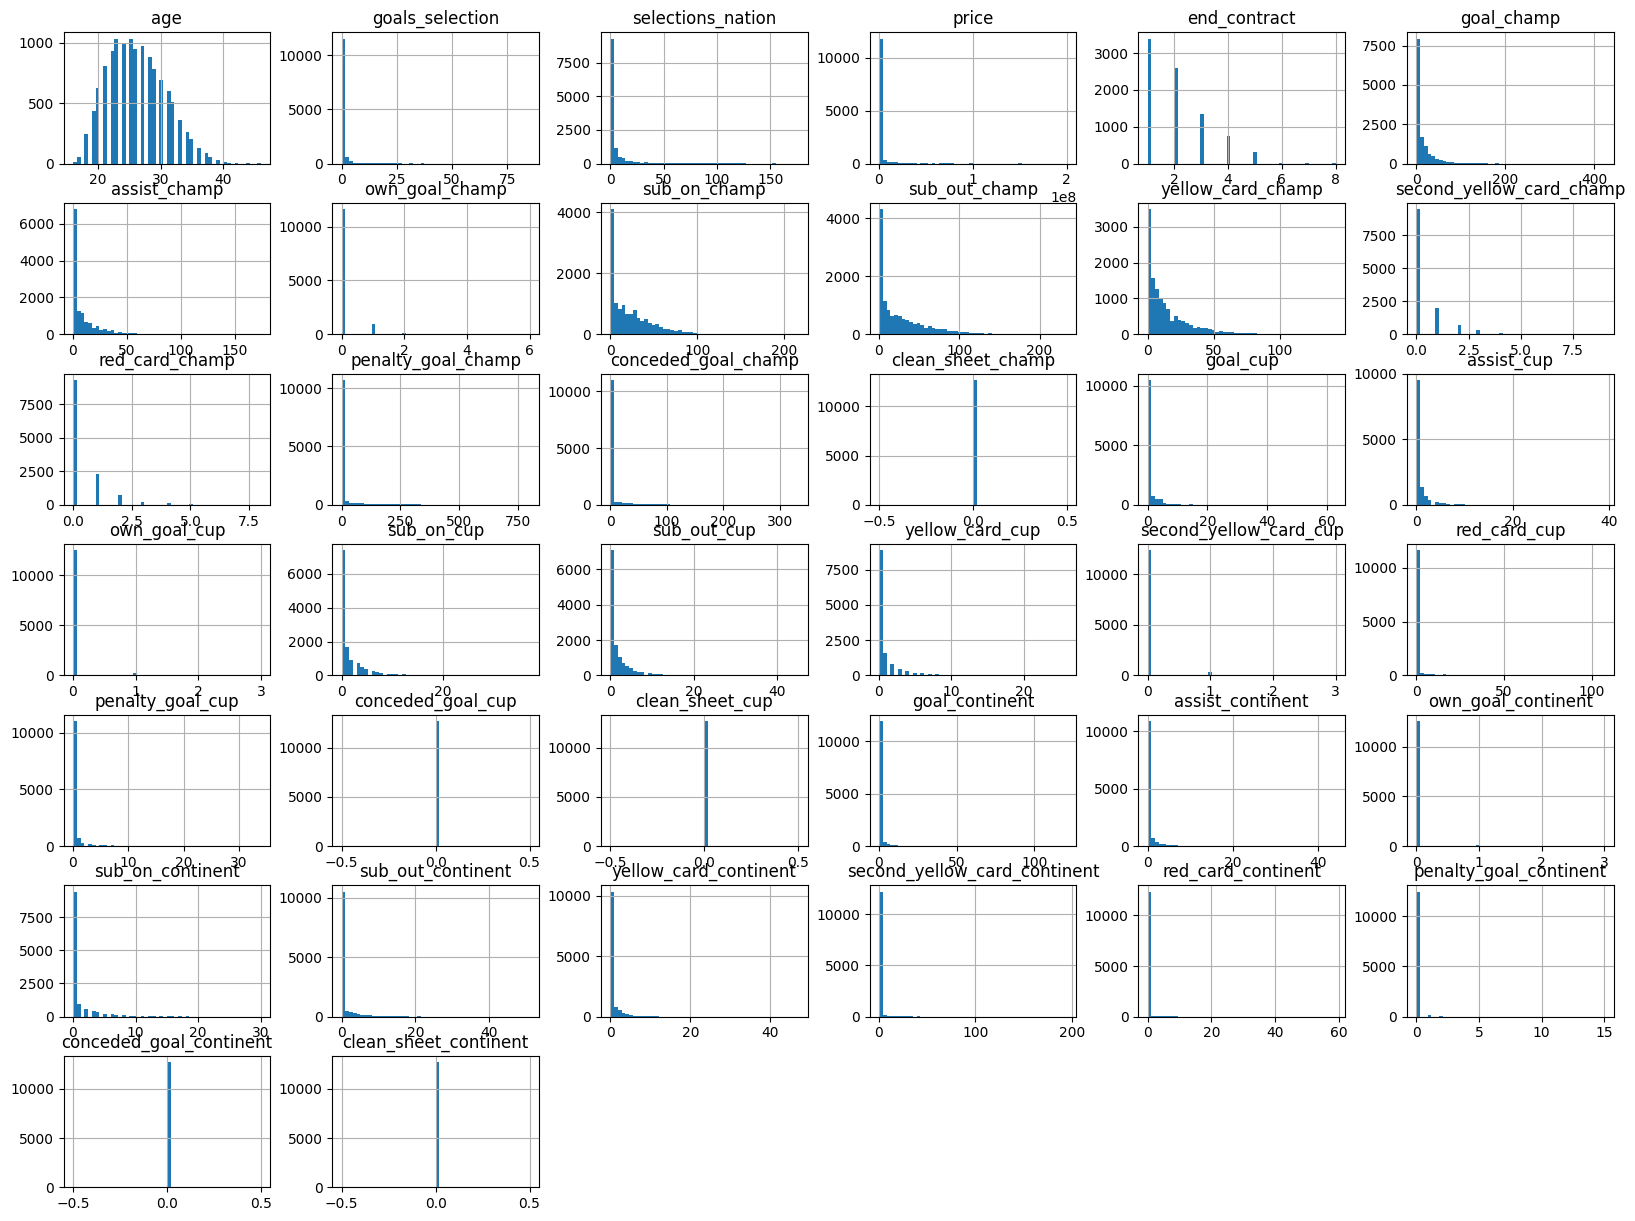

In [ ]:
df1.hist(bins=50, figsize=(20,15))

#Outlier Analysis


1.  age : Selected. The distribution is good.
2.   goals_selection : Outliers seen beyond 40, need to treat them.
3.   selections_nation : The distribution is good.






<Axes: xlabel='age', ylabel='goals_selection'>

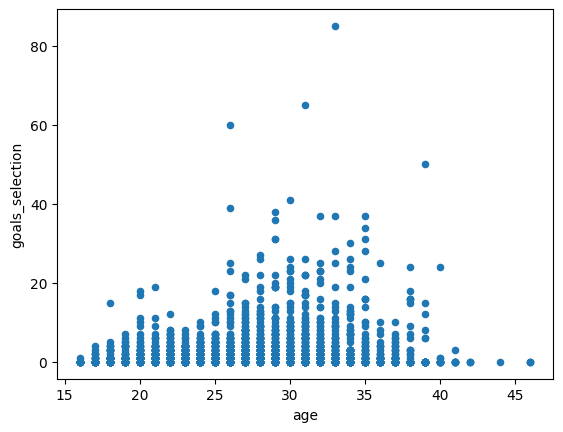

In [ ]:
df1.plot.scatter(x='age', y='goals_selection')

In [ ]:
df1=df1[df1['goals_selection']<=40]

<Axes: xlabel='age', ylabel='goals_selection'>

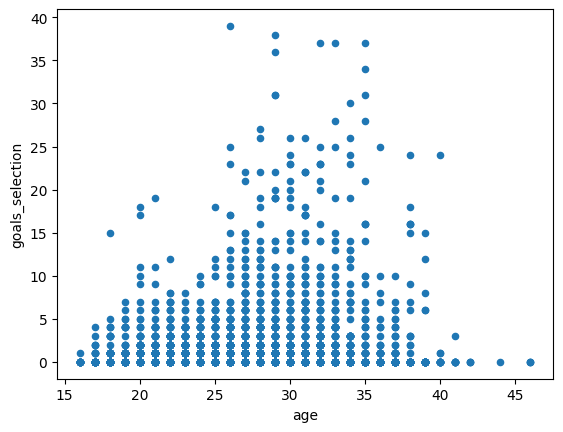

In [ ]:
df1.plot.scatter(x='age', y='goals_selection')

array([[<Axes: title={'center': 'goals_selection'}>]], dtype=object)

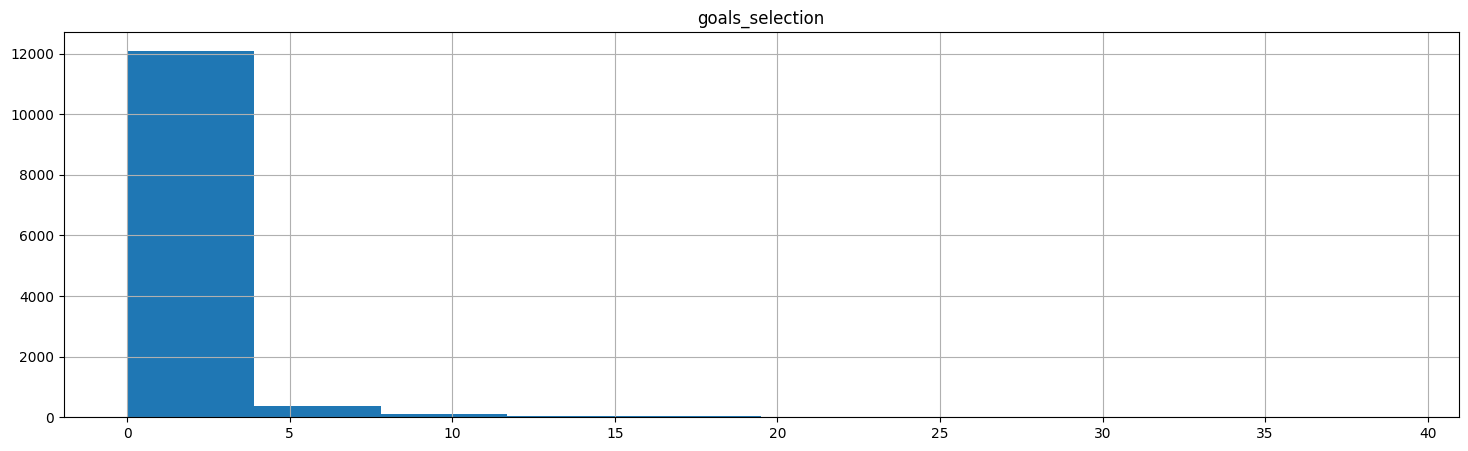

In [ ]:
df1.hist(['goals_selection'], figsize=(18,5))

<Axes: xlabel='age', ylabel='selections_nation'>

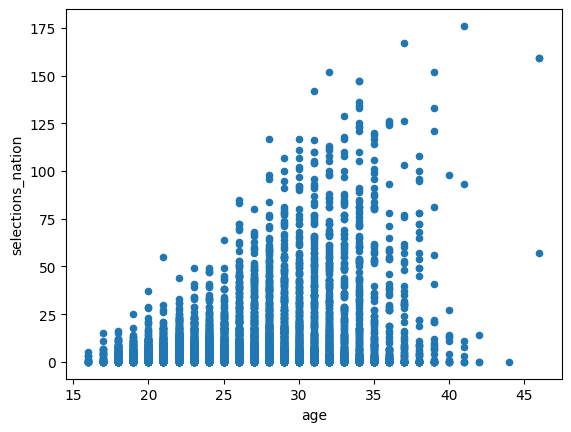

In [ ]:
df1.plot.scatter(x='age', y='selections_nation')

In [ ]:
df1.isnull().sum()

,0
name,0
first_name,1057
age,0
nation,0
league,0
team,0
goals_selection,0
selections_nation,0
position,0
price,0


In [ ]:
df1 = df1.drop(columns=['end_contract'])

In [ ]:
df1.columns

Index(['name', 'first_name', 'age', 'nation', 'league', 'team',
       'goals_selection', 'selections_nation', 'position', 'price',
       'goal_champ', 'assist_champ', 'own_goal_champ', 'sub_on_champ',
       'sub_out_champ', 'yellow_card_champ', 'second_yellow_card_champ',
       'red_card_champ', 'penalty_goal_champ', 'conceded_goal_champ',
       'clean_sheet_champ', 'goal_cup', 'assist_cup', 'own_goal_cup',
       'sub_on_cup', 'sub_out_cup', 'yellow_card_cup',
       'second_yellow_card_cup', 'red_card_cup', 'penalty_goal_cup',
       'conceded_goal_cup', 'clean_sheet_cup', 'goal_continent',
       'assist_continent', 'own_goal_continent', 'sub_on_continent',
       'sub_out_continent', 'yellow_card_continent',
       'second_yellow_card_continent', 'red_card_continent',
       'penalty_goal_continent', 'conceded_goal_continent',
       'clean_sheet_continent'],
      dtype='object')

# end_contract is removed for having missing values also other object value columns are removed as well

# Feature Selection (Attribute Selection)
For this dataset, the Target variable is Continuous, hence following two scenarios will need attention


1.   Continuous Target Variable Vs Continuous Predictor
2.   Continuous Target Variable Vs Categorical Predictor




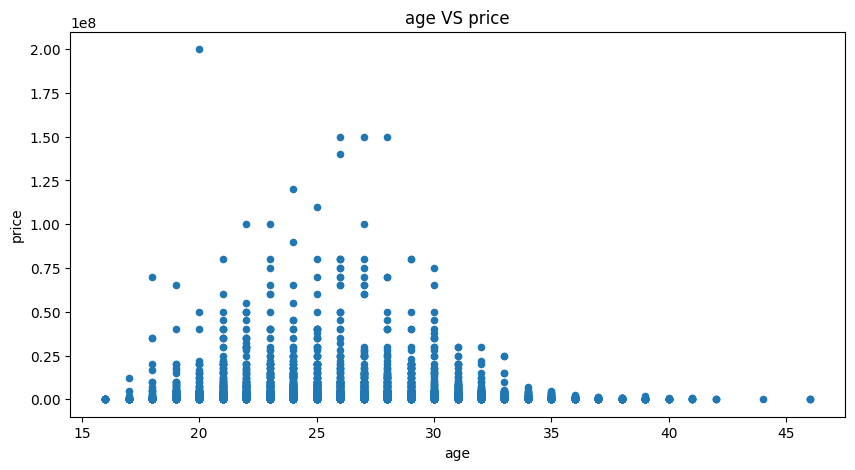

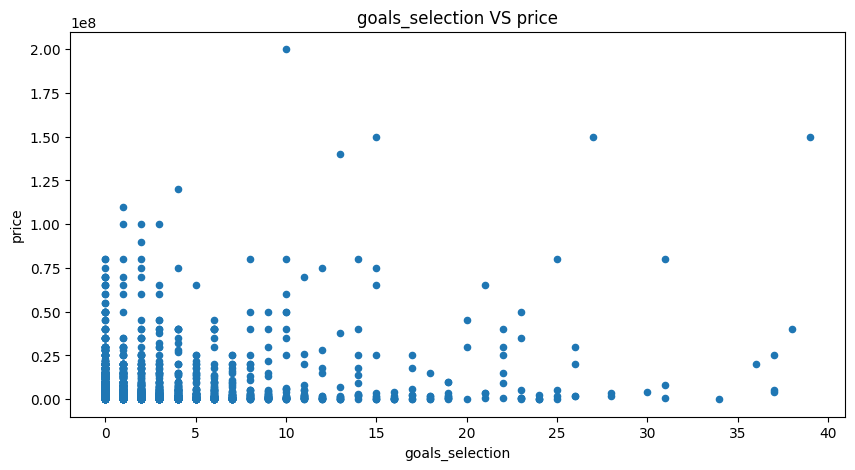

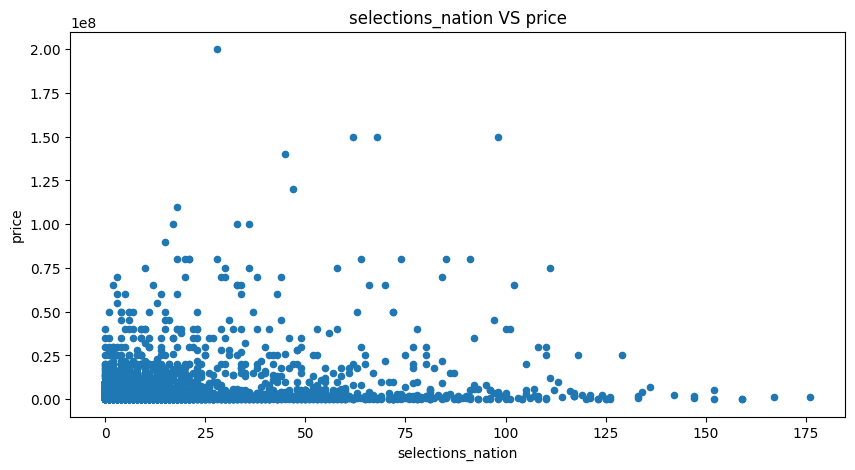

In [ ]:
ContinuousCols=['age','goals_selection','selections_nation']

# Plotting scatter chart for each predictor vs thetarget variable
for predictor in ContinuousCols:df1.plot.scatter(x=predictor, y='price',figsize=(10,5), title=predictor+" VS "+'price')

# Statistical Feature Selection

In [ ]:
# Calculating correlation matrix
ContinuousCols=['age','goals_selection','selections_nation','goal_champ',
       'assist_champ', 'sub_on_champ', 'sub_out_champ',
       'yellow_card_champ','penalty_goal_champ', 'conceded_goal_champ',
       'goal_cup', 'assist_cup','sub_on_cup', 'sub_out_cup',
       'yellow_card_cup', 'red_card_cup',
       'penalty_goal_cup',
       'goal_continent', 'assist_continent','sub_on_continent', 'sub_out_continent', 'yellow_card_continent',
       'second_yellow_card_continent', 'red_card_continent']

# Creating the correlation matrix
CorrelationData=df1[ContinuousCols].corr()
CorrelationData

,age,goals_selection,selections_nation,goal_champ,assist_champ,sub_on_champ,sub_out_champ,yellow_card_champ,penalty_goal_champ,conceded_goal_champ,...,yellow_card_cup,red_card_cup,penalty_goal_cup,goal_continent,assist_continent,sub_on_continent,sub_out_continent,yellow_card_continent,second_yellow_card_continent,red_card_continent
age,1.000000,0.136635,0.269833,0.303178,0.314812,0.305678,0.381706,0.492799,0.319071,0.318140,...,0.230173,0.222135,0.241002,0.146850,0.155022,0.204261,0.211969,0.213077,0.178534,0.165066
goals_selection,0.136635,1.000000,0.684449,0.459581,0.469905,0.257813,0.346031,0.203627,-0.069311,-0.073812,...,0.134637,-0.054201,-0.027679,0.475960,0.476118,0.353795,0.440667,0.296333,-0.035016,-0.024320
selections_nation,0.269833,0.684449,1.000000,0.357351,0.425300,0.231231,0.319804,0.321523,0.093597,0.141158,...,0.203267,0.065332,0.116667,0.383097,0.422553,0.366887,0.414696,0.383371,0.201936,0.204127
goal_champ,0.303178,0.459581,0.357351,1.000000,0.834874,0.647046,0.794478,0.512611,-0.178743,-0.189990,...,0.249687,-0.140782,-0.076249,0.527404,0.470210,0.412924,0.486932,0.327621,-0.093460,-0.071442
assist_champ,0.314812,0.469905,0.425300,0.834874,1.000000,0.630468,0.796519,0.535793,-0.174871,-0.182198,...,0.297661,-0.134413,-0.074832,0.548898,0.592518,0.468805,0.570181,0.402849,-0.088903,-0.067234
sub_on_champ,0.305678,0.257813,0.231231,0.647046,0.630468,1.000000,0.820184,0.525716,-0.261575,-0.257273,...,0.286110,-0.191968,-0.146026,0.303036,0.297306,0.432272,0.394852,0.271149,-0.128943,-0.101921
sub_out_champ,0.381706,0.346031,0.319804,0.794478,0.796519,0.820184,1.000000,0.646085,-0.232581,-0.232185,...,0.330593,-0.174947,-0.121066,0.394258,0.395390,0.433825,0.497893,0.345674,-0.113712,-0.087237
yellow_card_champ,0.492799,0.203627,0.321523,0.512611,0.535793,0.525716,0.646085,1.000000,-0.044202,-0.040595,...,0.468388,-0.063337,-0.018199,0.260035,0.274381,0.305245,0.347330,0.471909,-0.005347,0.006036
penalty_goal_champ,0.319071,-0.069311,0.093597,-0.178743,-0.174871,-0.261575,-0.232581,-0.044202,1.000000,0.932766,...,-0.130129,0.571702,0.529621,-0.068378,-0.062470,-0.059756,-0.098275,-0.087095,0.498861,0.436826
conceded_goal_champ,0.318140,-0.073812,0.141158,-0.189990,-0.182198,-0.257273,-0.232185,-0.040595,0.932766,1.000000,...,-0.128306,0.552400,0.554505,-0.074793,-0.067368,-0.049790,-0.101366,-0.087568,0.615206,0.558177


In [ ]:
# Calculating correlation matrix
ContinuousCols=['age','goals_selection','selections_nation', 'price']  # Include 'price'

# Creating the correlation matrix
CorrelationData=df1[ContinuousCols].corr()

# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['price'][abs(CorrelationData['price']) > 0.2 ]

,price
goals_selection,0.295463
selections_nation,0.266203
price,1.000000


In [ ]:
df1.nunique()

,0
name,9198
first_name,4609
age,29
nation,167
league,74
team,1057
goals_selection,36
selections_nation,133
position,12
price,130


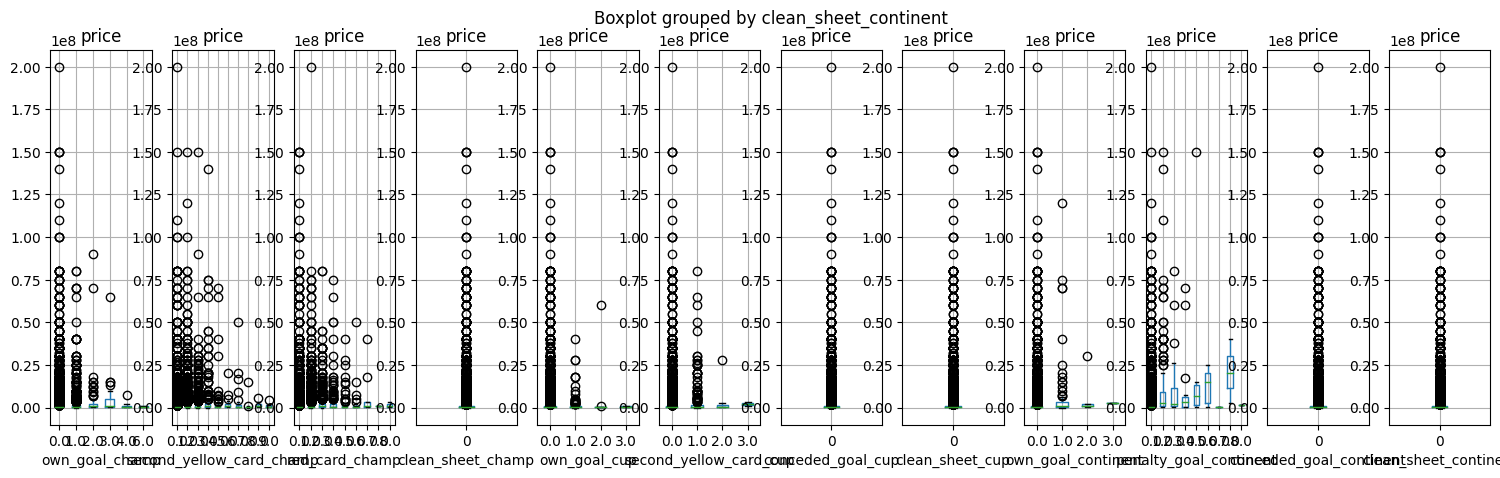

In [ ]:
# Box plots for continuous Target Variable "price" and Categorical predictors
CategoricalColsList=['own_goal_champ', 'second_yellow_card_champ','red_card_champ','clean_sheet_champ',
                     'own_goal_cup','second_yellow_card_cup','conceded_goal_cup','clean_sheet_cup','own_goal_continent',
                     'penalty_goal_continent','conceded_goal_continent','clean_sheet_continent']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    df1.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

## ANOVA test

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        # Check if there are at least two groups for the current predictor
        if len(CategoryGroupLists) >= 2:
            AnovaResults = f_oneway(*CategoryGroupLists)

            # If the ANOVA P-Value is <0.05, that means we reject H0
            if (AnovaResults[1] < 0.05):
                print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
                SelectedPredictors.append(predictor)
            else:
                print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
        else:
            print(f"Skipping ANOVA test for '{predictor}' - Insufficient groups.")

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['own_goal_champ', 'second_yellow_card_champ','red_card_champ','clean_sheet_champ',
                     'own_goal_cup','second_yellow_card_cup','conceded_goal_cup','clean_sheet_cup','own_goal_continent',
                     'penalty_goal_continent','conceded_goal_continent','clean_sheet_continent']
FunctionAnova(inpData=df1,
              TargetVariable='price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

own_goal_champ is correlated with price | P-Value: 3.7478476410941765e-07
second_yellow_card_champ is correlated with price | P-Value: 5.893283501295806e-27
red_card_champ is correlated with price | P-Value: 6.512840656795296e-13
Skipping ANOVA test for 'clean_sheet_champ' - Insufficient groups.
own_goal_cup is NOT correlated with price | P-Value: 0.264323379129016
second_yellow_card_cup is correlated with price | P-Value: 0.001282846157047229
Skipping ANOVA test for 'conceded_goal_cup' - Insufficient groups.
Skipping ANOVA test for 'clean_sheet_cup' - Insufficient groups.
own_goal_continent is correlated with price | P-Value: 4.605092466922904e-10
penalty_goal_continent is correlated with price | P-Value: 5.557488299402674e-118
Skipping ANOVA test for 'conceded_goal_continent' - Insufficient groups.
Skipping ANOVA test for 'clean_sheet_continent' - Insufficient groups.


['own_goal_champ',
 'second_yellow_card_champ',
 'red_card_champ',
 'second_yellow_card_cup',
 'own_goal_continent',
 'penalty_goal_continent']



# Selecting final Predictors

1.   Continusous= 'age' , 'goals_selection',
  'selections_nation'
2.   Categorical= 'own_goal_champ',
  'red_card_champ'


In [ ]:
SelectedColumns=['age', 'goals_selection','selections_nation', 'own_goal_champ', 'red_card_champ']

# Selecting final columns
DataForML=df1[SelectedColumns]
DataForML.head()

,age,goals_selection,selections_nation,own_goal_champ,red_card_champ
0,28,0,60,0.0,0.0
1,21,0,0,0.0,0.0
2,20,0,1,0.0,0.0
3,21,0,0,0.0,0.0
4,30,0,0,0.0,0.0


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['price']=df1['price']

# Printing sample rows
DataForML_Numeric.head()

,age,goals_selection,selections_nation,own_goal_champ,red_card_champ,price
0,28,0,60,0.0,0.0,4000000.0
1,21,0,0,0.0,0.0,800000.0
2,20,0,1,0.0,0.0,650000.0
3,21,0,0,0.0,0.0,50000.0
4,30,0,0,0.0,0.0,200000.0


In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns


Index(['age', 'goals_selection', 'selections_nation', 'own_goal_champ',
       'red_card_champ', 'price'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['age', 'goals_selection','selections_nation', 'own_goal_champ','red_card_champ']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Standardization/Normalization of data

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8894, 5)
(8894,)
(3812, 5)
(3812,)


# Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.09708495037511577

##### Model Validation and Accuracy Calculations ##########
        age  goals_selection  selections_nation  own_goal_champ  \
0  0.100000         0.000000           0.005682             0.0   
1  0.200000         0.025641           0.051136             0.0   
2  0.233333         0.025641           0.005682             0.0   
3  0.200000         0.000000           0.005682             0.0   
4  0.300000         0.025641           0.102273             0.0   

   red_card_champ      price  Predictedprice  
0           0.000   300000.0       2090499.0  
1           0.000  3000000.0       2652188.0  
2           0.000   300000.0       1866161.0  
3           0.000  3500000.0       1553545.0  
4           0.125   350000.0       3166153.0  
Mean Accuracy on test data: -841.4442441978338
Median Accuracy on test data: -180.86350000000004

Accuracy values for 10-fold Cross Validation:
 [ -263.19501609  -812.56899461  -374.67103433  -241.7312224


# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.3150952170691015

##### Model Validation and Accuracy Calculations ##########
        age  goals_selection  selections_nation  own_goal_champ  \
0  0.100000         0.000000           0.005682             0.0   
1  0.200000         0.025641           0.051136             0.0   
2  0.233333         0.025641           0.005682             0.0   
3  0.200000         0.000000           0.005682             0.0   
4  0.300000         0.025641           0.102273             0.0   

   red_card_champ      price  Predictedprice  
0           0.000   300000.0       1114266.0  
1           0.000  3000000.0       4369895.0  
2           0.000   300000.0       1114266.0  
3           0.000  3500000.0       1114266.0  
4           0.125   350000.0       5688021.0  
Mean Accuracy on test data: -425.0487769505621
Median Accuracy on test data: -77.047

Accuracy values for 10-fold Cross Validation:
 [ -181.99330755  -476.66133593 

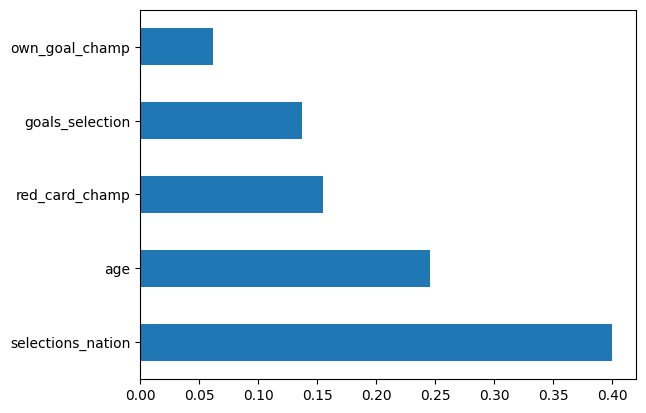

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting/Visualising the Decision Tree

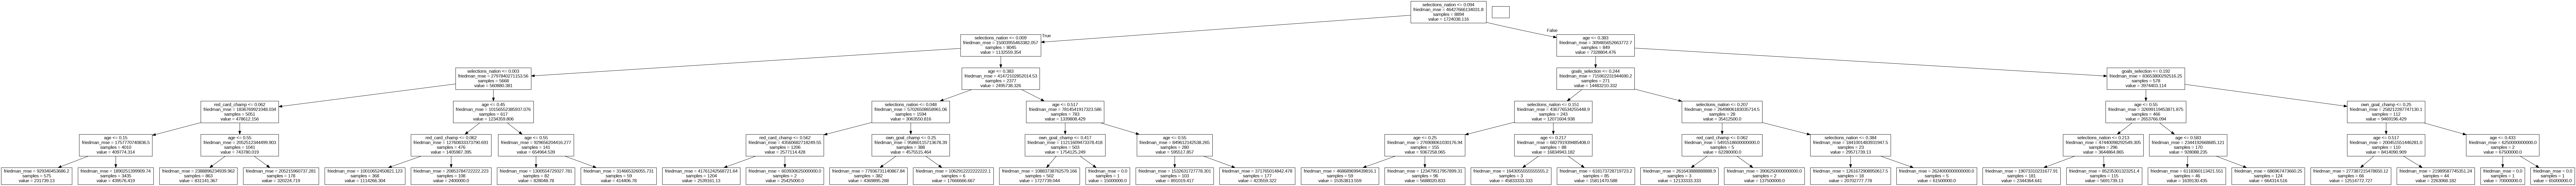

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors) # Remove class_names as it is not relevant for regression

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.283625330317929

##### Model Validation and Accuracy Calculations ##########
        age  goals_selection  selections_nation  own_goal_champ  \
0  0.100000         0.000000           0.005682             0.0   
1  0.200000         0.025641           0.051136             0.0   
2  0.233333         0.025641           0.005682             0.0   
3  0.200000         0.000000           0.005682             0.0   
4  0.300000         0.025641           0.102273             0.0   

   red_card_champ      price  Predictedprice  
0           0.000   300000.0       1318451.0  
1           0.000  3000000.0       3592174.0  
2           0.000   300000.0       1366984.0  
3           0.000  3500000.0       1325407.0  
4           0.125   350000.0       8501544.0  
Mean Accuracy on test data: -457.8671961688883
Median Accuracy on test data: -81.52133333333333

Accuracy values for 10-fold Cross Validation:
 [ -

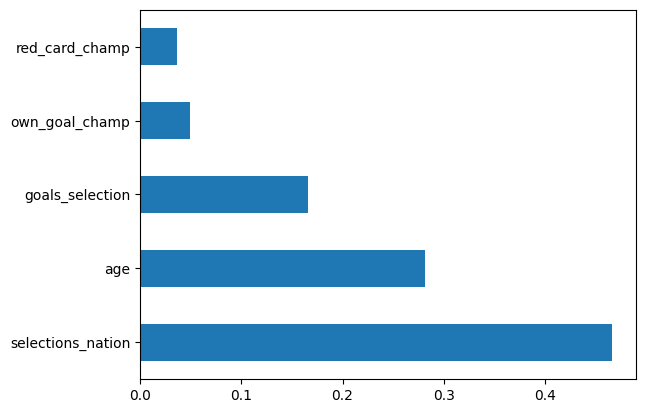

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

In [ ]:
# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5], out_file=None,
                                feature_names=Predictors, class_names=None) # Set class_names to None for regression

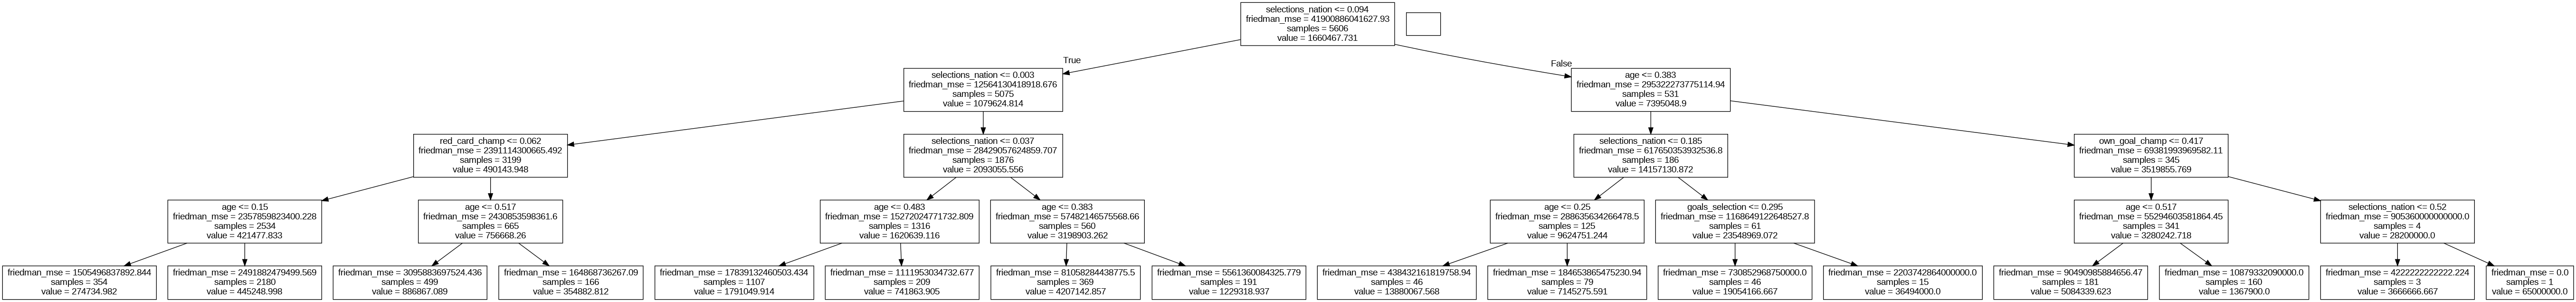

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None,
                                feature_names=Predictors,
                                class_names=None) # Set class_names to None for regression

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)
# Double click on the graph to zoom in

# AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R2 Value: 0.08156376442036828

##### Model Validation and Accuracy Calculations ##########
        age  goals_selection  selections_nation  own_goal_champ  \
0  0.100000         0.000000           0.005682             0.0   
1  0.200000         0.025641           0.051136             0.0   
2  0.233333         0.025641           0.005682             0.0   
3  0.200000         0.000000           0.005682             0.0   
4  0.300000         0.025641           0.102273             0.0   

   red_card_champ      price  Predictedprice  
0           0.000   300000.0        804698.0  
1           0.000  3000000.0       5665643.0  
2           0.000   300000.0        804698.0  
3           0.000  3500000.0        804698.0  
4           0.125   350000.0      13660511.0  
Mean Accuracy on test data: -958.5233033056231
Median Accuracy on test data: -270.37333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en


Accuracy values for 10-fold Cross Validation:
 [ -443.86042916 -1047.9653557   -658.58151248  -327.11820411
 -1093.44962324  -948.70188711  -594.69905807  -651.41754742
 -2494.31509737 -1652.70251045]

Final Average Accuracy of the model: -991.28


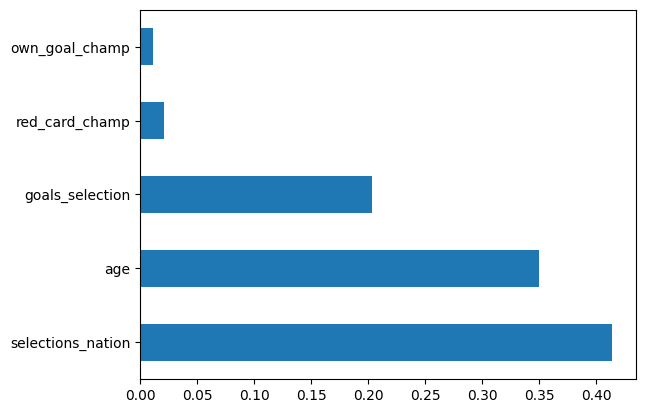

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:08:42] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Value: 0.532529664739886

##### Model Validation and Accuracy Calculations ##########
    age  goals_selection  selections_nation  own_goal_champ  red_card_champ  \
0  26.0              0.0                0.0             0.0             0.0   
1  27.0              1.0                2.0             0.0             0.0   
2  27.0              0.0                0.0             0.0             0.0   
3  22.0              0.0                1.0             0.0             1.0   
4  32.0              0.0                1.0             0.0             1.0   

      price  Predictedprice  
0  200000.0        440175.0  
1   50000.0       1531376.0  
2  250000.0        444768.0  
3  150000.0       2373099.0  
4  800000.0       1077989.0  
Mean Accuracy on test data: -472.91665593496475
Median Accuracy on test data: -68.2926


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:08:42] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:08:43] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:08:44] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:08:45] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [ -175.66356866  -528.41657419  -299.62431592  -142.65911831
  -477.2709661   -427.52778821  -275.63640092  -284.51135202
 -1166.36122411  -834.6738425 ]

Final Average Accuracy of the model: -461.23


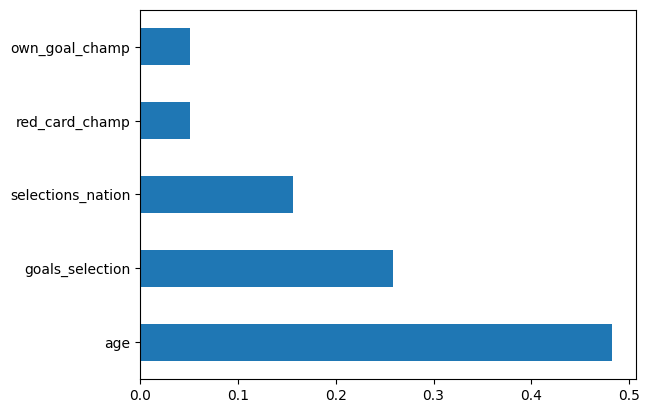

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting a single Decision tree out of XGBoost

<Axes: >

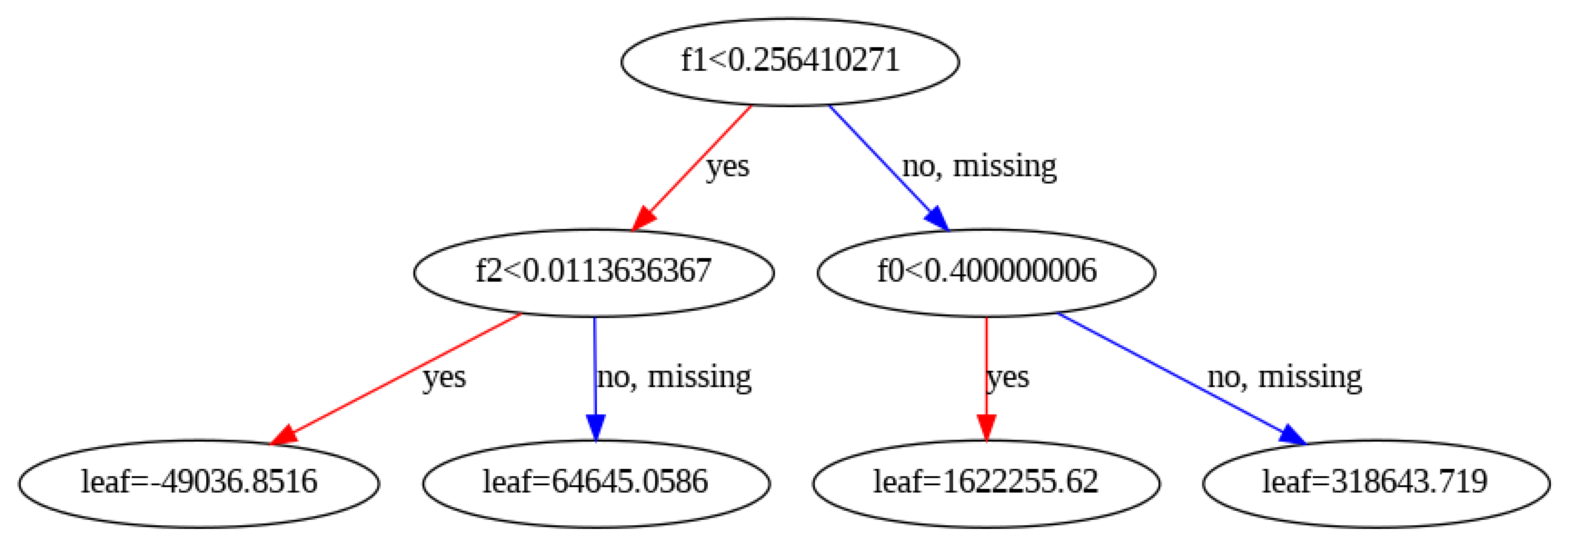

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

# K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.4093288506032643

##### Model Validation and Accuracy Calculations ##########
        age  goals_selection  selections_nation  own_goal_champ  \
0  0.100000         0.000000           0.005682             0.0   
1  0.200000         0.025641           0.051136             0.0   
2  0.233333         0.025641           0.005682             0.0   
3  0.200000         0.000000           0.005682             0.0   
4  0.300000         0.025641           0.102273             0.0   

   red_card_champ      price  Predictedprice  
0           0.000   300000.0       1616667.0  
1           0.000  3000000.0        316667.0  
2           0.000   300000.0        175000.0  
3           0.000  3500000.0       1141667.0  
4           0.125   350000.0       4500000.0  
Mean Accuracy on test data: -347.9110587390997
Median Accuracy on test data: 12.916672500000004

Accuracy values for 10-fold Cross Validation:
 [ -125.30399524  -574.40230927  -377.31484561 

# Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: -0.043677007954116887

##### Model Validation and Accuracy Calculations ##########
        age  goals_selection  selections_nation  own_goal_champ  \
0  0.100000         0.000000           0.005682             0.0   
1  0.200000         0.025641           0.051136             0.0   
2  0.233333         0.025641           0.005682             0.0   
3  0.200000         0.000000           0.005682             0.0   
4  0.300000         0.025641           0.102273             0.0   

   red_card_champ      price  Predictedprice  
0           0.000   300000.0        299957.0  
1           0.000  3000000.0        299977.0  
2           0.000   300000.0        299973.0  
3           0.000  3500000.0        299968.0  
4           0.125   350000.0        300015.0  
Mean Accuracy on test data: -65.95280884206136
Median Accuracy on test data: 24.0026

Accuracy values for 10-fold Cross Validation:
 [  -3.01903713   -9.15862975   19.6634115    -4.76375618 -130.67302

# Step 21: Model Deployment

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age', 'goals_selection','selections_nation', 'own_goal_champ', 'red_card_champ']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(12706, 5)
(12706,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:42] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:43] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:44] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:11:46] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [ -175.66356866  -528.41657419  -299.62431592  -142.65911831
  -477.2709661   -427.52778821  -275.63640092  -284.51135202
 -1166.36122411  -834.6738425 ]

Final Average Accuracy of the model: -461.23


# Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:02] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


# Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['age', 'goals_selection','selections_nation', 'own_goal_champ', 'red_card_champ']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Calling the function for some new data

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[4.98,6.575,15.3, 1.2, 0.5],[4.98,3.2,10.3, 0.8, 0.2]],
                           columns=['age', 'goals_selection','selections_nation', 'own_goal_champ', 'red_card_champ'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

    age  goals_selection  selections_nation  own_goal_champ  red_card_champ
0  4.98            6.575               15.3             1.2             0.5
1  4.98            3.200               10.3             0.8             0.2


,Prediction
0,664422.125
1,2927406.000


# Conclusion
The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
 Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks in the platform /system.

# Deploying a predictive model as an API

Django and flask are two popular ways to deploy predictive models as a web service

# Deploying the model with few parameters

# Function for predictions API

In [ ]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_age, inp_goals_selection, inp_selections_nation, inp_own_goal_champ, inp_red_card_champ):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_age, inp_goals_selection, inp_selections_nation, inp_own_goal_champ, inp_red_card_champ]],
     columns=['age', 'goals_selection','selections_nation', 'own_goal_champ', 'red_card_champ'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_age=4.98, inp_goals_selection=6.5, inp_selections_nation=15.3, inp_own_goal_champ=1.2, inp_red_card_champ=0.5)



'{"Prediction":{"0":664422.125}}'

# Web Deployment using Flask Library/Package
# Installing the flask library required to create the API

In [ ]:
!pip install flask

# Creating Flask API

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        age_value = float(request.args.get('age'))
        goals_selection_value = float(request.args.get('goals_selection'))
        selections_nation_value = float(request.args.get('selections_nation'))
        own_goal_champ_value = float(request.args.get('own_goal_champ'))
        red_card_champ_value = float(request.args.get('red_card_champ'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(inp_age = age_value,inp_goals_selection = goals_selection_value,
                                                       inp_selections_nation = selections_nation_value,inp_own_goal_champ = own_goal_champ_value,
                                                       inp_red_card_champ = red_card_champ_value)

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


# Desktop App deployment: Tkinter package


1.  Will not work on Google Colab.
2.  Need to use PyCharm to run this code.




In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class FootballPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Football Price Prediction')
        # Load the data from the CSV file
        self.data = pd.read_csv('dataset_football_cleaned.csv')
        self.sliders = []

        self.X = self.data.drop('price', axis=1).values
        self.y = self.data['price'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted house price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = FootballPricePredictionApp(root)
    root.mainloop()

# END OF PROGRAMMING PROJECT